In [2]:
from astropy.io import fits #to read in FITS files
from astropy.wcs import WCS #to read coordinates
from reproject import reproject_interp #to align images
import os # os.path to manipulate file paths 
import glob # finding pathnames (to search for certain fits files in folders and subfolders)
import numpy as np # math applied to arrays (important, no need to read pixel for pixel!)
from matplotlib import pyplot as plt #plot library 
from astropy.visualization import ZScaleInterval #create minimum and maximum Z values for plotting 


In [3]:
# Returns the header and data of a .fit file.
def get_data(data_im):
    hdu = fits.open(data_im)[0]
    header = hdu.header 
    data = hdu.data

    print(header)

    return header, data

# Change the data with whatever fit you're using.
# Easiest to 'copy relative path' if you're using the GitHub folder.
# Don't forget to change \ to /.
fit_g = "NGC_4449_g_stack_astrometry.fits"
fit_r = "NGC_4449_r_stack_astrometry.fits"
fit_L = 'NGC_4449_L_stack_astrometry.fits'
fit_ha = 'NGC_4449_ha_stack_astrometry.fits'

header_L, dat_L = get_data(fit_L)
header_g, dat_g = get_data(fit_g)
header_r, dat_r = get_data(fit_r)
header_ha, dat_ha = get_data(fit_ha)


SIMPLE  =                    T                                                  BITPIX  =                  -32 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 4096 /fastest changing axis                           NAXIS2  =                 4096 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =  0.00000000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2024-05-23T22:26:22.06' /YYYY-MM-DDThh:mm:ss observation, UT         EXPTIME =   60.000000000000000 /Exposure time in seconds                        EXPOSURE=   60.000000000000000 /Exposure time in seconds                        SET-TEMP=  -10.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -10.000000000000000 /CCD temperature at start of exposure in C       XPIXSZ  =   9.0000000000000000 /Pixel Wi

Below code for aligning images

In [4]:
# Reference coordinates.
wcs_ref = WCS(header_g)

# Aligns image with the reference coordinates.
def reproject_image(image_filename, wcs_ref):
    hdu = fits.open(image_filename)[0]
    array, footprint = reproject_interp(hdu, wcs_ref)
    return array

aligned_g = reproject_image(fit_g, wcs_ref)
aligned_r = reproject_image(fit_r, wcs_ref)
aligned_ha = reproject_image(fit_ha, wcs_ref)
aligned_L = reproject_image(fit_L, wcs_ref)

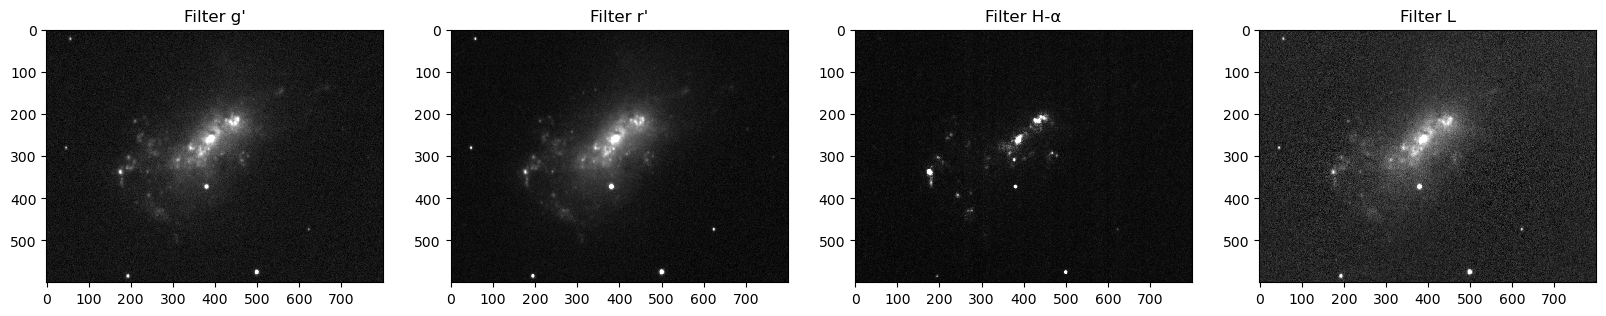

In [5]:
# x, y limits to crop images (1600, 2400, 1800, 2400 to see only NGC 4449)
x_min, x_max, y_min, y_max = 1600, 2400, 1800, 2400

# Crop the images
cropped_g= aligned_g[y_min:y_max, x_min:x_max]
cropped_r = aligned_r[y_min:y_max, x_min:x_max]
cropped_ha = aligned_ha[y_min:y_max, x_min:x_max]
cropped_L = aligned_L[y_min:y_max, x_min:x_max]

# Visualize the cropped images
quantiles_g = np.percentile(cropped_g, (0.1, 99.9))
quantiles_r = np.percentile(cropped_r, (0.1, 99.9))
quantiles_ha = np.percentile(cropped_ha, (0.1, 99.9))
quantiles_L = np.percentile(cropped_L, (0.1, 99.9))
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(cropped_g, cmap='gray', vmin = quantiles_g[0], vmax = quantiles_g[1], interpolation = 'nearest')
axs[0].set_title("Filter g'")
axs[1].imshow(cropped_r, cmap='gray', vmin = quantiles_r[0], vmax = quantiles_r[1], interpolation = 'nearest')
axs[1].set_title("Filter r'")
axs[2].imshow(cropped_ha, cmap='gray', vmin = quantiles_ha[0], vmax = quantiles_ha[1], interpolation = 'nearest')
axs[2].set_title("Filter H-α")
axs[3].imshow(cropped_L, cmap='gray', vmin = quantiles_L[0], vmax = quantiles_L[1], interpolation = 'nearest')
axs[3].set_title('Filter L')
plt.show()

BENS CODE 


In [6]:
from astropy.io import fits #to read in FITS files
from astropy.wcs import WCS #to read coordinates
import os # os.path to manipulate file paths 
import glob # finding pathnames (to search for certain fits files in folders and subfolders)
import numpy as np # math applied to arrays (important, no need to read pixel for pixel!)
from matplotlib import pyplot as plt #plot library 
from astropy.visualization import ZScaleInterval #create minimum and maximum Z values for plotting 
from astropy.stats import sigma_clip

In [7]:
#test
h_alpha_file = 'NGC_4449_ha_stack_astrometry.fits'
g_prime_file = "NGC_4449_g_stack_astrometry.fits"
r_prime_file = "NGC_4449_r_stack_astrometry.fits"
l_file = 'NGC_4449_L_stack_astrometry.fits'


#h_alpha_data = fits.getdata(h_alpha_file)
#g_prime_data = fits.getdata(g_prime_file)
#r_prime_data = fits.getdata(r_prime_file)
#l_data = fits.getdata(l_file)
#print(r_prime_data)
#print(g_prime_data)
#print(h_alpha_data)
#print(l_data)

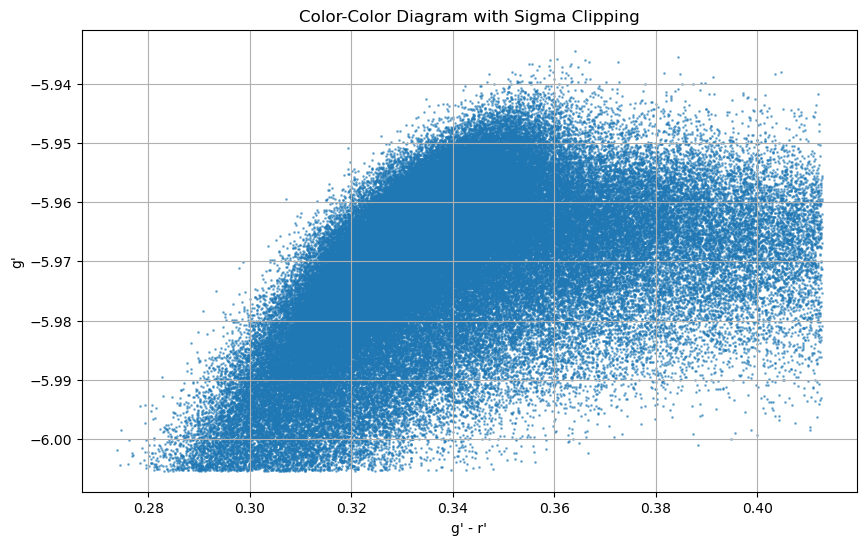

In [8]:
##MIJN OUDE CODE

# Laad de FITS bestanden
h_alpha_file = 'NGC_4449_ha_stack_astrometry.fits'
g_prime_file = "NGC_4449_g_stack_astrometry.fits"
r_prime_file = "NGC_4449_r_stack_astrometry.fits"
l_file = 'NGC_4449_L_stack_astrometry.fits'


h_alpha_data = fits.getdata(h_alpha_file)
g_prime_data = fits.getdata(g_prime_file)
r_prime_data = fits.getdata(r_prime_file)
l_data = fits.getdata(l_file)

# Definieer een functie om de magnitude te berekenen
def calculate_magnitude(flux, C=0):
    # Voeg een kleine waarde toe om log(0) te vermijden
    flux = np.where(flux <= 0, np.nan, flux)
    return -2.5 * np.log10(flux) + C

# Functie om een rechthoekig gebied uit te snijden en magnitudes te berekenen
def extract_region_and_calculate_magnitudes(data, x_start, x_end, y_start, y_end, C=0):
    region_data = data[y_start:y_end, x_start:x_end]
    return calculate_magnitude(region_data, C)

# Definieer het gebied van interesse (bijv. pixels van 1800 tot 2200 op beide assen)
x_start, x_end = 1800, 2300
y_start, y_end = 1900, 2300

# Bereken de magnitudes voor het geselecteerde gebied
h_alpha_mag = extract_region_and_calculate_magnitudes(h_alpha_data, x_start, x_end, y_start, y_end)
g_prime_mag = extract_region_and_calculate_magnitudes(g_prime_data, x_start, x_end, y_start, y_end)
r_prime_mag = extract_region_and_calculate_magnitudes(r_prime_data, x_start, x_end, y_start, y_end)
l_mag = extract_region_and_calculate_magnitudes(l_data, x_start, x_end, y_start, y_end)

# Maak een kleur-kleur diagram (bijvoorbeeld g' - r' tegen r' - H-alpha)
color1 = g_prime_mag - r_prime_mag
color2 = g_prime_mag

# Pas sigma clipping toe
color1_clipped = sigma_clip(color1, sigma=3, maxiters=5)
color2_clipped = sigma_clip(color2, sigma=3, maxiters=5)

# Maak een scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(color1_clipped, color2_clipped, s=1, alpha=0.5)  # s is de grootte van de punten, alpha is de transparantie
plt.xlabel("g' - r'")
plt.ylabel("g'")
plt.title("Color-Color Diagram with Sigma Clipping")
plt.grid(True)
plt.show()

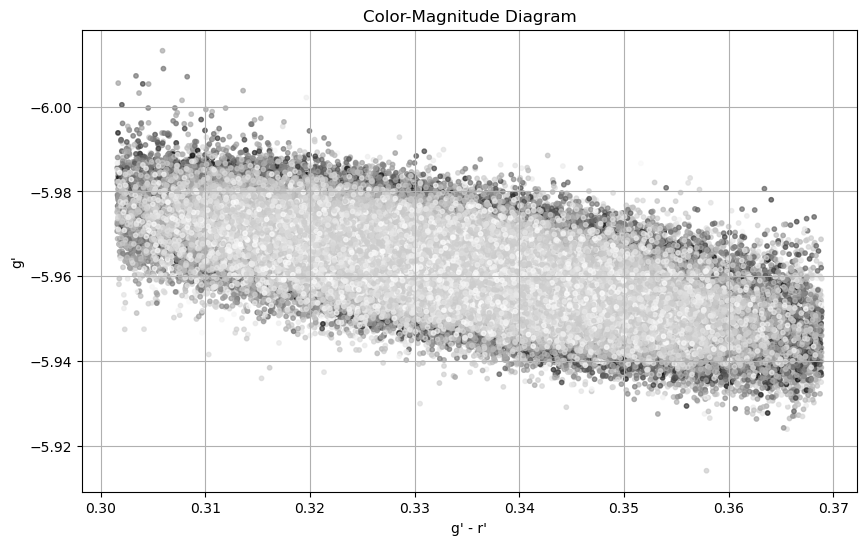

In [12]:
##GEKKE CODE CHATGPT

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clip

# Laad de FITS bestanden
h_alpha_file = cropped_ha
g_prime_file = cropped_g
r_prime_file = cropped_r
l_file = cropped_L

h_alpha_data = dat_ha
g_prime_data = dat_g
r_prime_data = dat_r
l_data = dat_L

# Definieer een functie om de magnitude te berekenen
def calculate_magnitude(flux, C=0):
    # Voeg een kleine waarde toe om log(0) te vermijden
    flux = np.where(flux <= 0, np.nan, flux)
    return -2.5 * np.log10(flux) + C

# Functie om een rechthoekig gebied uit te snijden en magnitudes te berekenen
def extract_region_and_calculate_magnitudes(data, x_start, x_end, y_start, y_end, C=0):
    region_data = data[y_start:y_end, x_start:x_end]
    return calculate_magnitude(region_data, C)

# Definieer het gebied van interesse (bijv. pixels van 1800 tot 2200 op beide assen)
x_start, x_end = 0, (x_max - x_min)
y_start, y_end = 0, (y_max - y_min)

# Bereken de magnitudes voor het geselecteerde gebied
h_alpha_mag = extract_region_and_calculate_magnitudes(h_alpha_data, x_start, x_end, y_start, y_end)
g_prime_mag = extract_region_and_calculate_magnitudes(g_prime_data, x_start, x_end, y_start, y_end)
r_prime_mag = extract_region_and_calculate_magnitudes(r_prime_data, x_start, x_end, y_start, y_end)
l_mag = extract_region_and_calculate_magnitudes(l_data, x_start, x_end, y_start, y_end)

# Functie om de gemiddelde magnitude per 10x10 gebied te berekenen en kleuren toe te wijzen
def plot_cmd_with_color(g_mag, r_mag, x_start, x_end, y_start, y_end, region_size=1):
    center_x = (x_start + x_end) / 2
    center_y = (y_start + y_end) / 2

    cmd_x = []
    cmd_y = []
    colors = []

    for i in range(x_start, x_end, region_size):
        for j in range(y_start, y_end, region_size):
            g_region = g_mag[j:j+region_size, i:i+region_size]
            r_region = r_mag[j:j+region_size, i:i+region_size]
            
            if np.isnan(g_region).all() or np.isnan(r_region).all():
                continue
            
            avg_g_mag = np.nanmean(g_region)
            avg_r_mag = np.nanmean(r_region)
            
            region_center_x = i + region_size / 2
            region_center_y = j + region_size / 2
            distance_to_center = np.sqrt((region_center_x - center_x)**2 + (region_center_y - center_y)**2)
            
            max_distance = np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2) / 2
            gray_level = distance_to_center / max_distance
            color = (gray_level, gray_level, gray_level)
            
            cmd_x.append(avg_g_mag - avg_r_mag)
            cmd_y.append(avg_g_mag)
            colors.append(color)

    # Converteer naar numpy arrays voor sigma clipping
    cmd_x = np.array(cmd_x)
    cmd_y = np.array(cmd_y)
    colors = np.array(colors)

    # Pas sigma clipping toe
    clipped_x = sigma_clip(cmd_x, sigma=3, maxiters=5)
    clipped_y = sigma_clip(cmd_y, sigma=3, maxiters=5)

    # Verwijder de waarden die buiten de sigma clipping vallen
    valid_indices = ~clipped_x.mask & ~clipped_y.mask
    cmd_x = cmd_x[valid_indices]
    cmd_y = cmd_y[valid_indices]
    colors = colors[valid_indices]

    fig, ax = plt.subplots(figsize=(10, 6))
    sc = ax.scatter(cmd_x, cmd_y, c=colors, s=10, alpha=0.7)
    plt.xlabel("g' - r'")
    plt.ylabel("g'")
    plt.title("Color-Magnitude Diagram")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

# Plot de CMD met kleuring op basis van afstand tot het midden
plot_cmd_with_color(g_prime_mag, r_prime_mag, 0, g_prime_mag.shape[1], 0, g_prime_mag.shape[0])
